# Task 1: Basic Probabilities and Visualizations (1)

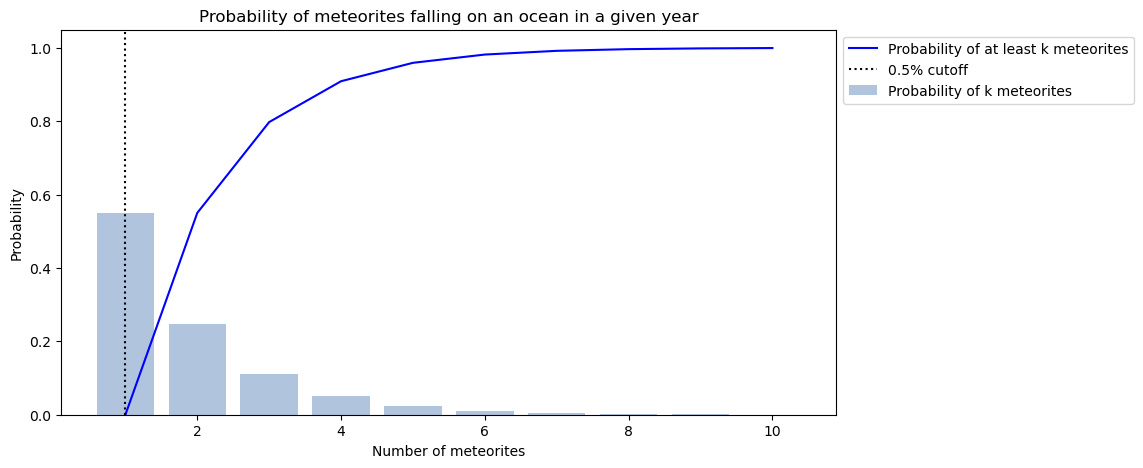

Expectation: 1.8182
Median: 1.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the probability of a meteorite falling on a given trial
p = 0.55

# Define a range of values for k
k = np.arange(1, 11)

# Calculate the probability of observing the first meteorite on the k-th trial
pmf = (1 - p) ** (k - 1) * p

# Calculate the probability of observing at least k meteorites in a given year
cdf = 1 - (1 - p) ** (k - 1)

# Find the smallest value of k such that P(X >= k) is less than 0.5%
idx = np.argmax(cdf < 0.005)
# Plot the probabilities
plt.figure(figsize=(10, 5))
plt.bar(k, pmf, color = 'lightsteelblue', label='Probability of k meteorites')
plt.plot(k, cdf, color = 'blue',label='Probability of at least k meteorites')
plt.axvline(idx+1, color='black', linestyle='dotted', label='0.5% cutoff')
plt.xlabel('Number of meteorites')
plt.ylabel('Probability')
plt.title('Probability of meteorites falling on an ocean in a given year')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Calculate the expectation and median
expectation = 1 / p
median = np.ceil(-1 / np.log2(1 - p))

print(f'Expectation: {expectation:.4f}')
print(f'Median: {median}')


# Task 2: Basic Probabilities and Visualizations (2)


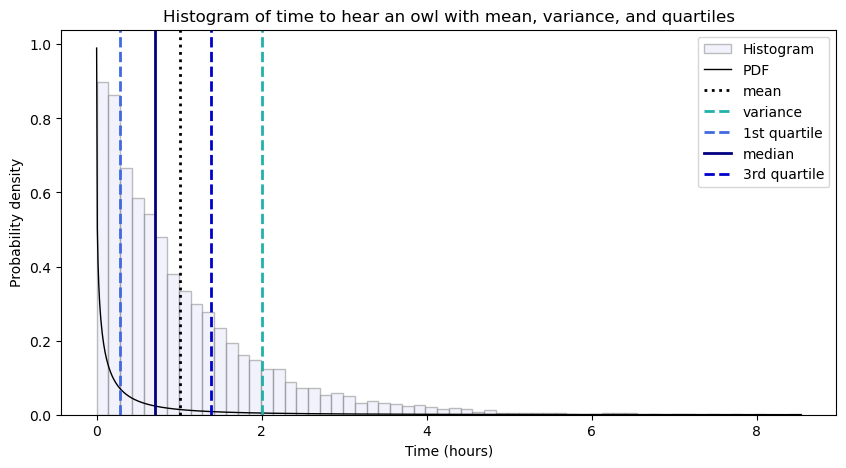

Mean: 1.0064
Variance: 1.0067
1st quartile: 0.2840
Median: 0.7014
3rd quartile: 1.3904


In [485]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(y):
    return 0.34*np.exp(-5*np.sqrt(y)) + 0.65*np.exp(-4*np.cbrt(y))

# Generate a random sample of waiting times in minutes
n = 10000
wait_times = np.random.exponential(scale=60, size=n)

# Convert waiting times from minutes to hours
wait_times_h = wait_times / 60

# Calculate the PDF of the waiting times
y = np.linspace(0, np.max(wait_times_h), 1000)
p = pdf(y)

# Calculate the mean and variance of the waiting times
mu = np.mean(wait_times_h)
sigma2 = np.var(wait_times_h)

# Calculate the quartiles of the waiting times
q1, q2, q3 = np.percentile(wait_times_h, [25, 50, 75])

# Plot the histogram, PDF, mean, variance, and quartiles
plt.figure(figsize=(10, 5))
plt.hist(wait_times_h, bins=60, density=True, alpha=0.5,label='Histogram',color='lavender',edgecolor = 'grey')
plt.plot(y, p, 'black',linestyle='-', lw=1, label='PDF')
plt.axvline(mu, color='black', linestyle='dotted', linewidth=2, label ='mean')
plt.axvline(mu+np.sqrt(sigma2), color='lightseagreen', linestyle='dashed', linewidth=2, label='variance')
plt.axvline(q1, color='royalblue', linestyle='dashed', linewidth=2, label='1st quartile')
plt.axvline(q2, color='navy', linestyle='solid', linewidth=2, label='median')
plt.axvline(q3, color='mediumblue', linestyle='dashed', linewidth=2,label='3rd quartile')
plt.xlabel('Time (hours)')
plt.ylabel('Probability density')
plt.title('Histogram of time to hear an owl with mean, variance, and quartiles')
plt.legend()
plt.show()

print(f'Mean: {mu:.4f}')
print(f'Variance: {sigma2:.4f}')
print(f'1st quartile: {q1:.4f}')
print(f'Median: {q2:.4f}')
print(f'3rd quartile: {q3:.4f}')

In [486]:
#####################

# Task 5: Regularized Regression 

In [1]:
import numpy as np

# Given sample data
data = np.array([[9, 12.91], [5, 17.59], [7, 15.78], [-3, 11.65], [-5, 6.7],
                 [-8, 0.95], [-7, 2.79], [-6, 4.76], [1, 18.09], [3, 18.3],
                 [8, 13.78], [-4, 8.8]])

# Extract the x and y values
x = data[:, 0]
y = data[:, 1]

# Construct the design matrix X
p = 15  # We choose p=15 as a reasonable estimate for the period
X = np.column_stack([np.ones_like(x), np.cos(2*np.pi*x/p - 0), np.cos(4*np.pi*x/p - 0),np.cos(6*np.pi*x/p - 0)])

# Construct the response vector y
y = np.reshape(y, (-1, 1))


In [2]:
# Compute the OLS estimate
theta_ols = np.linalg.inv(X.T @ X) @ X.T @ y

In [3]:
#The OLS estimate o the parameters is given by:'
A0_ols = theta_ols[0]
A1_ols = theta_ols[1]
A2_ols = theta_ols[2]
A3_ols = theta_ols[3]
phi1_ols = 0   # We choose zero or simplicity
phi2_ols = 0
phi3_ols = 0
P_ols = p      # We choose the estimated period as the OLS estimate o P

In [4]:
from sklearn.model_selection import KFold

# Set up the range of lambda values to test
lambdas = np.logspace(-10,10,21) 


# Set up the k-fold cross-validation
kf = KFold(n_splits=5)

# Initialize the arrays to store the MSE on the validation set for each lambda value
mse_valid = np.zeros_like(lambdas)

# Perform the cross-validation
for i, lam in enumerate(lambdas):
    # Initialize the array to store the MSE on the validation set for this lambda value
    mse_valid_i = np.zeros(kf.get_n_splits())

    # Perform the k-fold cross-validation
    for j, (train_index, valid_index) in enumerate(kf.split(X)):
        # Split the data into training and validation sets
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        # Compute the ridge-regularized estimate of theta for this lambda value
        theta_ridge = np.linalg.inv(X_train.T @ X_train + lam*np.eye(X_train.shape[1])) @ X_train.T @ y_train
        
        # Compute the mean squared error on the validation set
        mse_valid_i[j] = np.mean((X_valid @ theta_ridge - y_valid)**2)

        # Compute the mean of the MSE on the validation set for this lambda value
        mse_valid[i] = np.mean(mse_valid_i)


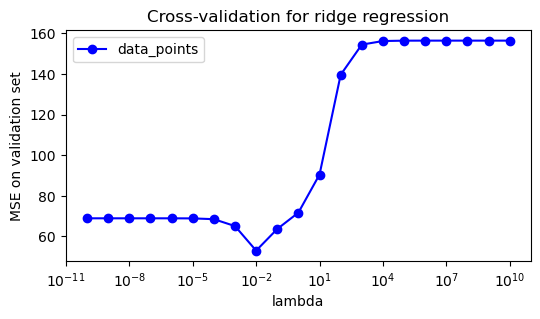

In [5]:
#Plot the MSE on the validation set as a function of lambda
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.semilogx(lambdas, mse_valid, 'bo-',label='data_points')
plt.xlabel('lambda')
plt.ylabel('MSE on validation set')
plt.title('Cross-validation for ridge regression')
plt.legend()
plt.show()

In [6]:
#Choose the optimal value of lambda
lambda_opt = lambdas[np.argmin(mse_valid)]

#Compute the ridge-regularized estimate of theta for the optimal lambda value
theta_ridge_opt = np.linalg.inv(X.T @ X + lambda_opt*np.eye(X.shape[1])) @ X.T @ y

#Compute the ridge-regularized estimates of the parameters
A0_ridge = theta_ridge_opt[0]
A1_ridge = theta_ridge_opt[1]
A2_ridge = theta_ridge_opt[2]
A3_ridge = theta_ridge_opt[3]
phi1_ridge = 0 # We choose zero for simplicity
phi2_ridge = 0
phi3_ridge = 0
P_ridge = p # We choose the estimated period as the ridge-regularized estimate of P

In [15]:
#The ols estimate of the parameters calculated earlier:
print('A0_ols is {}'.format(round(float(A0_ols),4)))
print('A1_ols is {}'.format(round(float(A1_ols),4)))
print('A2_ols is {}'.format(round(float(A2_ols),4)))
print('A3_ols is {}'.format(round(float(A3_ols),4)))
print('phi1_ols is {}'.format(phi1_ols))
print('phi2_ols is {}'.format(phi2_ols))
print('phi3_ols is {}'.format(phi3_ols))
print('P_ols is {}'.format(P_ols))


A0_ols is 13.1919
A1_ols is 5.1577
A2_ols is 0.52
A3_ols is 0.3585
phi1_ols is 0
phi2_ols is 0
phi3_ols is 0
P_ols is 15


In [11]:
#The ols ridge regularized estimate of the parameters calculated earlier:
print('A0_ridge is {}'.format(round(float(A0_ridge),4)))
print('A1_ridge is {}'.format(round(float(A1_ridge),4)))
print('A2_ridge is {}'.format(round(float(A2_ridge),4)))
print('A3_ridge is {}'.format(round(float(A3_ridge),4)))
print('phi1_ridge is {}'.format(phi1_ridge))
print('phi2_ridge is {}'.format(phi2_ridge))
print('phi3_ridge is {}'.format(phi3_ridge))
print('P_ridge is {}'.format(P_ridge))


A0_ridge is 13.1684
A1_ridge is 5.1262
A2_ridge is 0.5064
A3_ridge is 0.3534
phi1_ridge is 0
phi2_ridge is 0
phi3_ridge is 0
P_ridge is 15


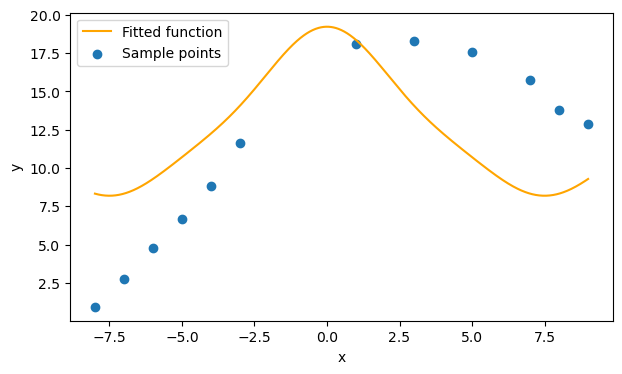

In [8]:
# Generate points to plot the fitted function
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
x_plot = np.linspace(min(x), max(x), 1000)
y_plot = A0_ols + A1_ols*np.cos(2*np.pi/P_ols*x_plot - phi1_ols) \
       + A2_ols*np.cos(2*np.pi/P_ols*2*x_plot - phi2_ols) \
       + A3_ols*np.cos(2*np.pi/P_ols*3*x_plot - phi3_ols)

# Plot the fitted function and the sample points
plt.plot(x_plot, y_plot, label='Fitted function',color='orange')
plt.scatter(x, y, label='Sample points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
# Calculate the predicted y values for the sample points
y_pred = A0_ols + A1_ols*np.cos(2*np.pi/P_ols*x - phi1_ols) \
       + A2_ols*np.cos(2*np.pi/P_ols*2*x - phi2_ols) \
       + A3_ols*np.cos(2*np.pi/P_ols*3*x - phi3_ols)

# Calculate the RMSE
rmse = np.sqrt(np.mean((y - y_pred)**2))
print(f'RMSE: {rmse:.4f}')


RMSE: 6.5922


In [10]:
############